In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
AirData=pd.read_csv('/content/EastWestAirlines.csv')
AirData

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


**Hierarchical Clustering**

In [3]:
#Custmized Normalization Function
#Here we can use standardized function as well from sklearn but to show you how we can write custmory
def norm_func(i):
  x=(i-i.min())/(i.max-i.min())

In [4]:
AirData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
AirData_=AirData.drop(['ID#'],axis=1)
AirData_

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
#Custmized Normalization Function
#Here we can use standardized function as well from sklearn but to show you how we can write custmory
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [7]:
AirData_norm = norm_func(AirData_)
AirData_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


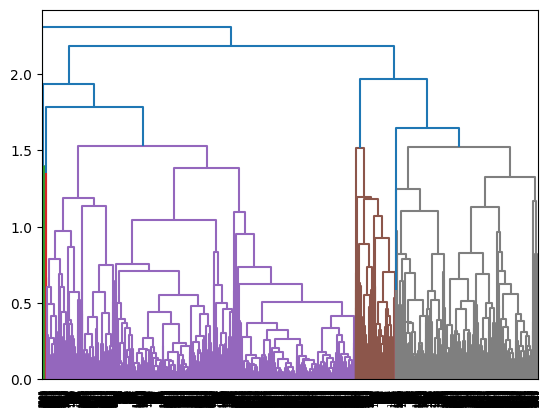

In [8]:
dendrogram=sch.dendrogram(sch.linkage(AirData_norm,'complete'))


In [9]:
#Create Cluster.If we want only 6 cluster
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [10]:
y_hc=pd.DataFrame(hc.fit_predict(AirData_norm),columns=['clustersid'])
y_hc['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    1011
0     808
4     699
2     582
3     535
5     364
Name: clustersid, dtype: int64

In [11]:
# Now let us map cluster membership to the data point
AirData_['clustersid']=hc.labels_
AirData_

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [12]:
y_hc

,clustersid
0,1
1,1
2,1
3,1
4,3
...,...
3994,2
3995,2
3996,5
3997,4


In [13]:
#If I want only Balance and clusterid
Air=AirData_.sort_values('clustersid')
Air.iloc[:,[0,11]]

,Balance,clustersid
1248,81291,0
773,32356,0
1823,25963,0
1819,30664,0
1817,75112,0
...,...,...
1316,74777,5
2992,60331,5
2993,47966,5
2964,49749,5


In [14]:
AirData_.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,87189.902062,375.512027,1.053265,1.039519,1.000000,7646.649485,9.438144,1070.049828,3.321306,4442.544674,1.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0
5,5,68109.631868,140.532967,2.733516,1.000000,1.000000,19167.903846,16.442308,321.280220,0.848901,4259.656593,1.0


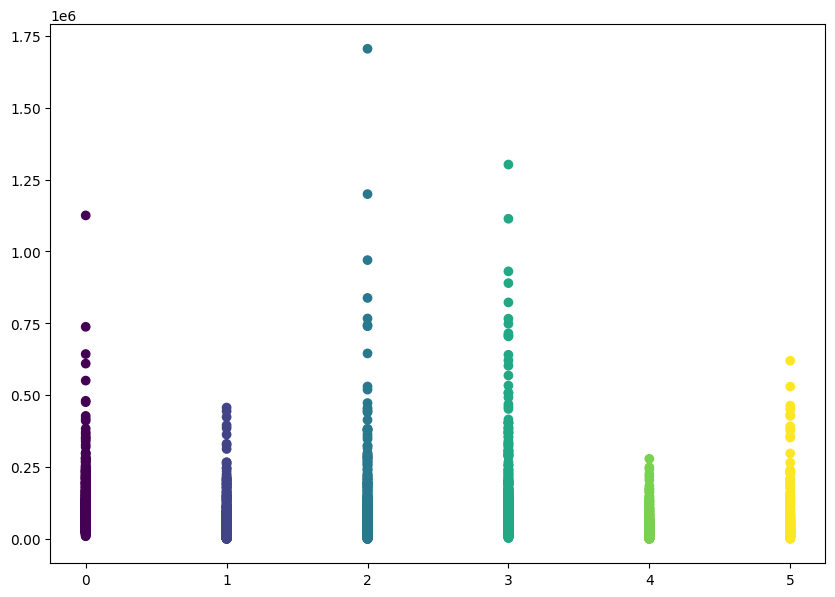

In [15]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(AirData_['clustersid'],AirData_['Balance'], c=hc.labels_)

**K-Means**

In [17]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=14,random_state=42)
kmeans.fit(AirData_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [33]:
# Select relevant features for clustering
features = AirData_[['Balance'	,'Qual_miles'	,'cc1_miles'	,'cc2_miles'	,'cc3_miles'	,'Bonus_miles'	,'Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]

In [34]:
# Drop rows with missing values
features.dropna(inplace=True)

<ipython-input-34-6da3356581a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [37]:
# Specify the number of clusters (k)
k = 4

In [38]:
# Fit the model to the air quality data
kmeans.fit(features_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=18, random_state=0)

In [39]:
# Add a new column to the DataFrame to store the cluster labels
AirData_['Cluster'] = kmeans.labels_


In [40]:
# Print the count of data points in each cluster
print(AirData_['Cluster'].value_counts())

5     752
9     698
10    514
4     484
16    305
1     300
0     296
12    206
14    144
15     65
2      63
13     46
17     37
7      29
8      28
3      15
6      15
11      2
Name: Cluster, dtype: int64


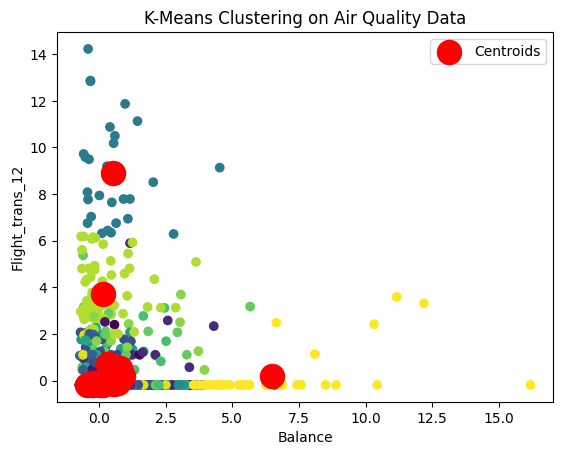

In [41]:
# Visualize the clusters (for 2D data, modify this for more dimensions)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=AirData_['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering on Air Quality Data')
plt.xlabel('Balance')
plt.ylabel('Flight_trans_12')
plt.legend()
plt.show()

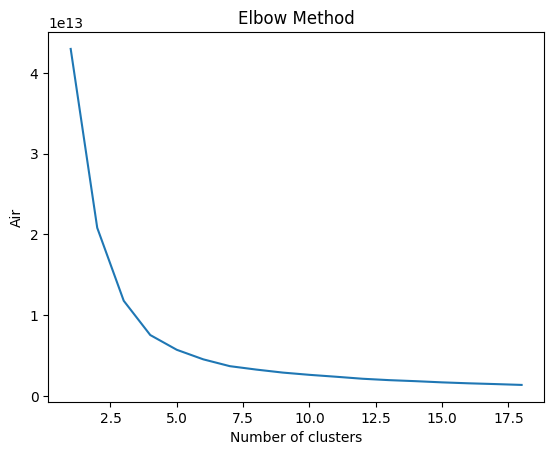

In [32]:
plt.plot(range(1, 19), Air)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Air')
plt.show()

**DBSCAN**

In [42]:
from sklearn.cluster import DBSCAN
DB=DBSCAN()
DB.fit_predict(AirData_)

array([-1, -1, -1, ..., -1, -1, -1])

In [43]:
DB2=DBSCAN(eps=1.5,min_samples=14)
DB2.fit_predict(AirData_)  #-1 are Outliers o are Normal data


array([-1, -1, -1, ..., -1, -1, -1])

In [44]:
DB2.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [59]:
#Check Which model is goog with EPS=1 or 2 using silhautte score
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import silhouette_samples



In [62]:
# Adding clusters to dataset
AirData_['clusters']=DB2.labels_
AirData_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,Cluster,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,9,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,9,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,9,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,9,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,4,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,4,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5,10,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,5,-1


In [63]:
AirData_.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343,2.099525,7.426357


In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [69]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [70]:
dist_matrix = squareform(pdist(features_scaled))


In [71]:
linked = linkage(dist_matrix, method='ward')

<ipython-input-71-eb45fe442542>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(dist_matrix, method='ward')


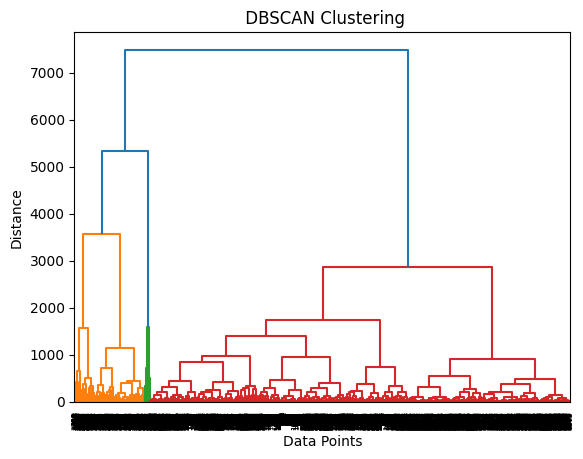

In [74]:
# Create a dendrogram-like plot
dendrogram(linked,
           orientation='top',
           labels=AirData_.index,  # You can use other labels or remove this line
           distance_sort='descending',
           show_leaf_counts=True)

plt.title(' DBSCAN Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()